<a href="https://colab.research.google.com/github/danielasenraoka/music_evolution/blob/main/exploratory_anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

# Load data

Hay 3 sets de datos distintos, uno separado por décadas desde 1950 hasta 2010, otro anual desde 1921 hasta 2020 y otro anual con clasificación de géneros.

In [2]:
df1950 = pd.read_csv('https://drive.google.com/uc?id=1noqg-775SO0v40hrgTtGsp1GOxivHZ6n')
df1960 = pd.read_csv('https://drive.google.com/uc?id=1f6liQlLGSttkfnbRmOOKewvWqbdwbXfQ')
df1970 = pd.read_csv('https://drive.google.com/uc?id=1Jg2CudFnNec1XjJCDqrn36yfqlUbq_vs')
df1980 = pd.read_csv('https://drive.google.com/uc?id=1hUBBrAvJ1TTEv6DX6C8jKIEKov0K0bt2')
df1990 = pd.read_csv('https://drive.google.com/uc?id=1ESVRKbOtHBTP0Xb4AS18fj_gVkjyZD0O')
df2000 = pd.read_csv('https://drive.google.com/uc?id=1b27bWLmepXYmbDNfQ6XIqBt2t3Eu2w4h')
df2010 = pd.read_csv('https://drive.google.com/uc?id=1uMLElUSFgFUh4r68Bia_sNo29lUJDwY8')

df1921_2020 = pd.read_csv('https://drive.google.com/uc?id=1WDwMPhvSGxKgyfKNLBm5o0dEXjBvJdIC')

# Los dataset anteriores tienen algunos géneros atípicos
# Agregamos este dataset para buscar los géneros que nos falten en ciertas canciones: 
# https://data.mendeley.com/datasets/3t9vbwxgr5/2/files/d2c58546-d8be-4d57-af14-b61337c927b2
df_genre = pd.read_csv('https://drive.google.com/uc?id=14r8pyBecJyFeGd0Dxky6H1KEM5JqY0l2') 


# Dataset separado por décadas

In [ ]:
df1950.head()

Number                                              title  ... spch pop
0       1                       Put Your Head On My Shoulder  ...    3  72
1       2  Whatever Will Be Will Be (Que Sera Sera) (with...  ...    4  62
2       3                           Everybody Loves Somebody  ...    4  61
3       4        Take Good Care Of My Baby - 1990 Remastered  ...    6  60
4       5                                 A Teenager In Love  ...    3  60

[5 rows x 15 columns]

In [ ]:
decades = ["1950", "1960", "1970", "1980", "1990", "2000", "2010"]

In [ ]:
for decade in decades:
  #lo llevo a /100 porque estaba porcentual, en la API están con un score de 0 a 1
  eval("df"+decade)['nrgy'] = eval("df"+decade)['nrgy']/100
  eval("df"+decade)['dnce'] = eval("df"+decade)['dnce']/100
  eval("df"+decade)['live'] = eval("df"+decade)['live']/100
  eval("df"+decade)['val'] = eval("df"+decade)['val']/100
  eval("df"+decade)['acous'] = eval("df"+decade)['acous']/100
  eval("df"+decade)['spch'] = eval("df"+decade)['spch']/100

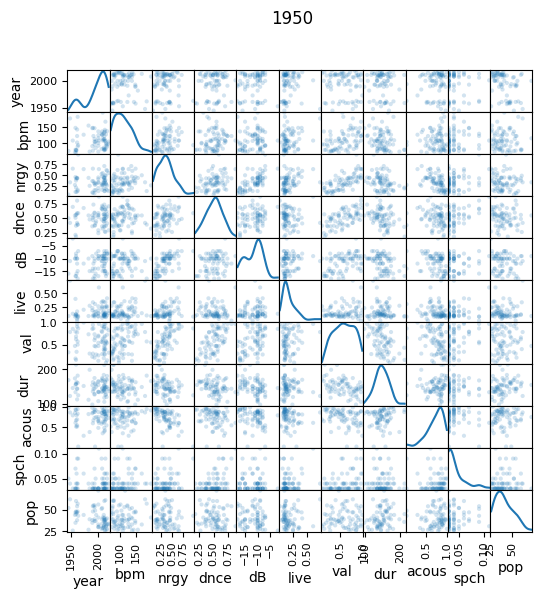

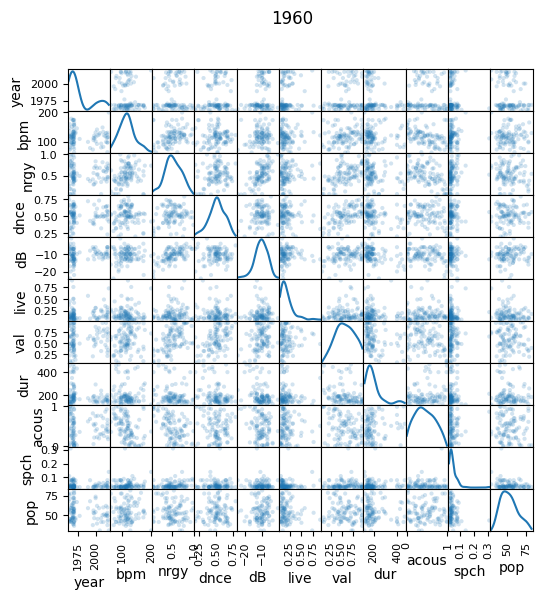

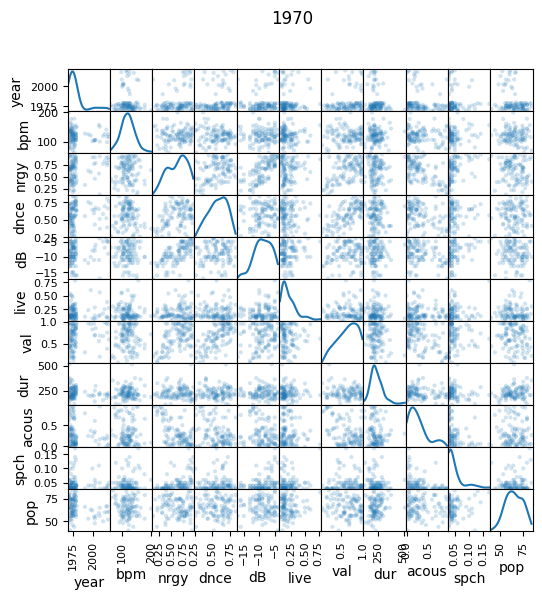

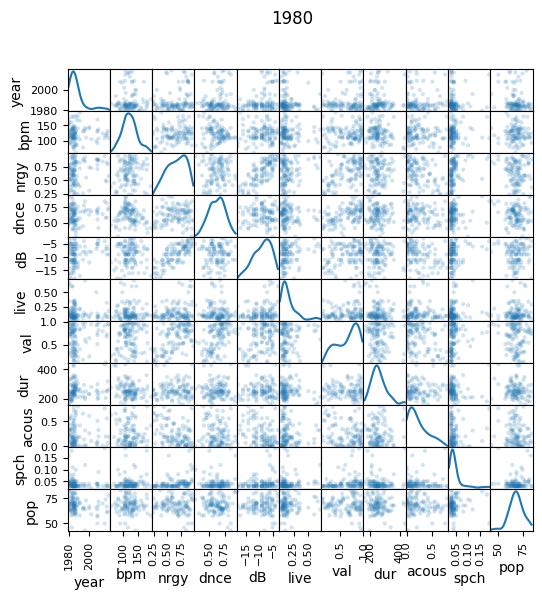

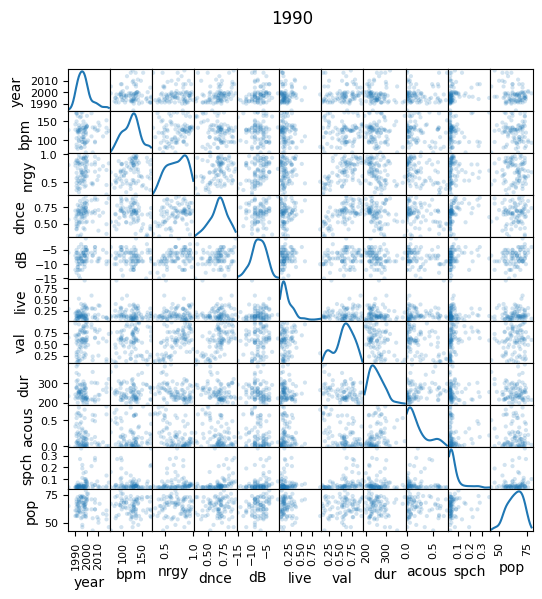

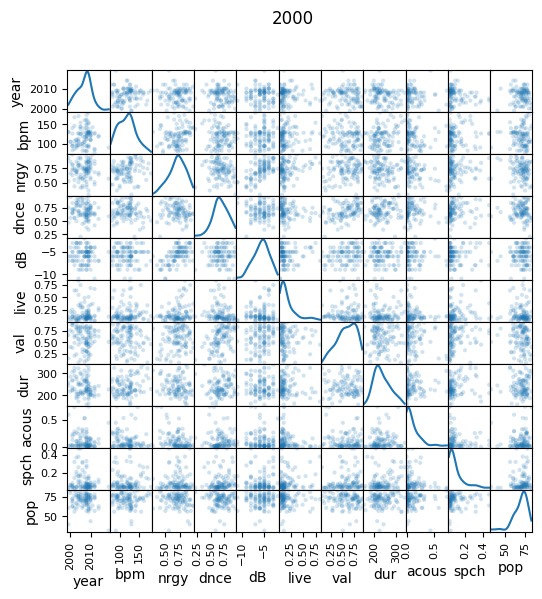

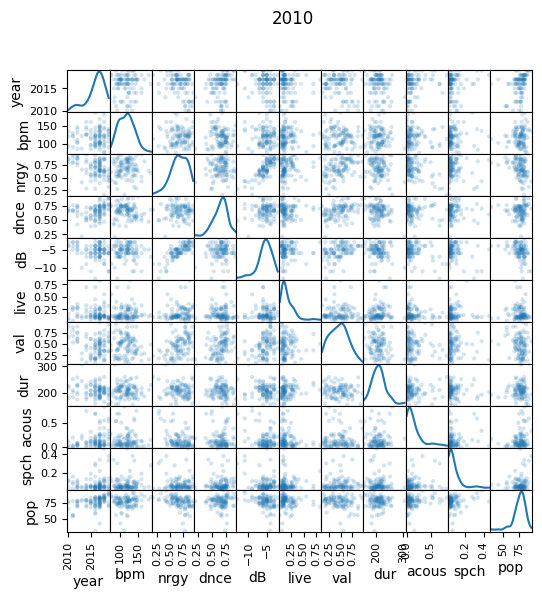

In [ ]:
plt.style.use('default')
for decade in decades:
  scatter_matrix(eval("df"+decade).drop(columns='Number'), alpha=0.2, figsize=(6, 6),  diagonal="kde")
  plt.suptitle(decade)
  plt.show()

## Evolución de las variables en el tiempo

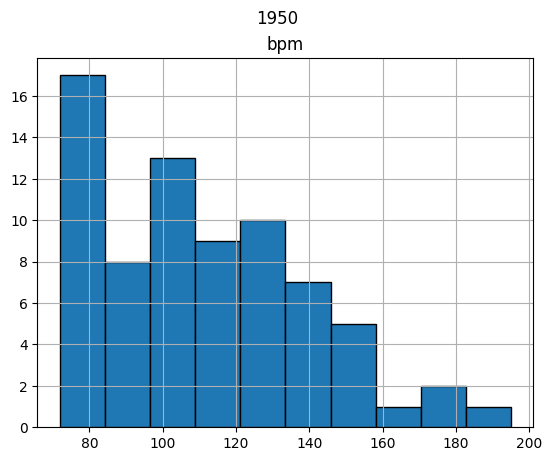

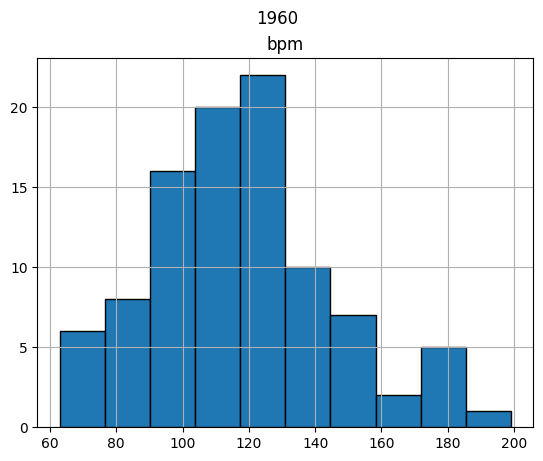

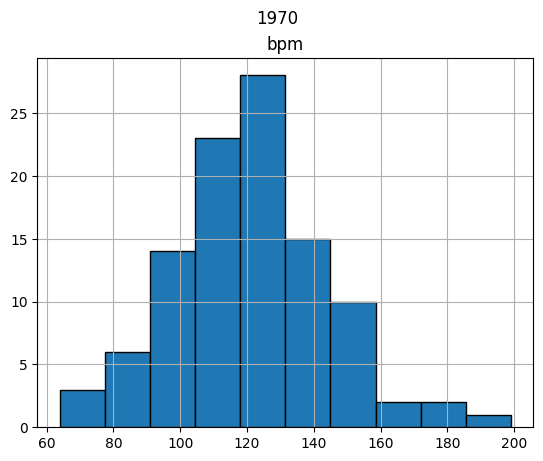

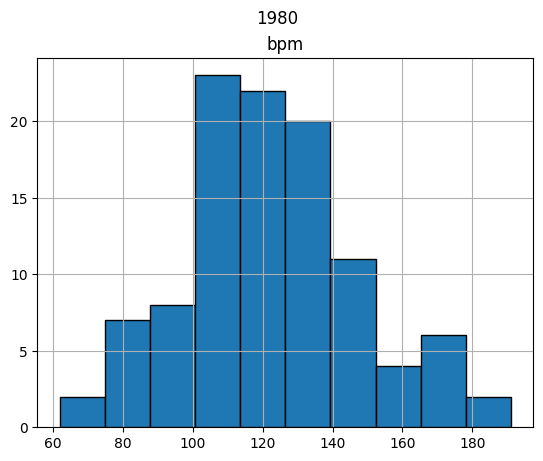

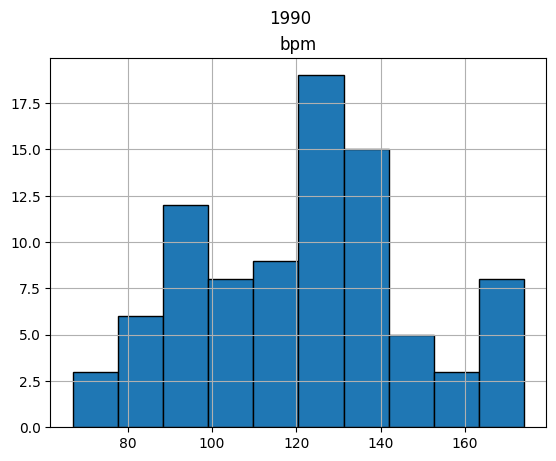

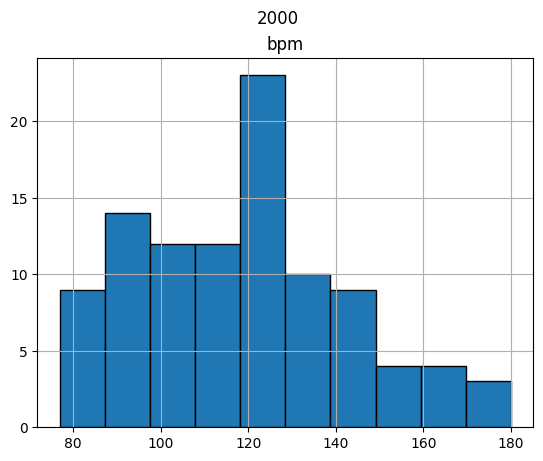

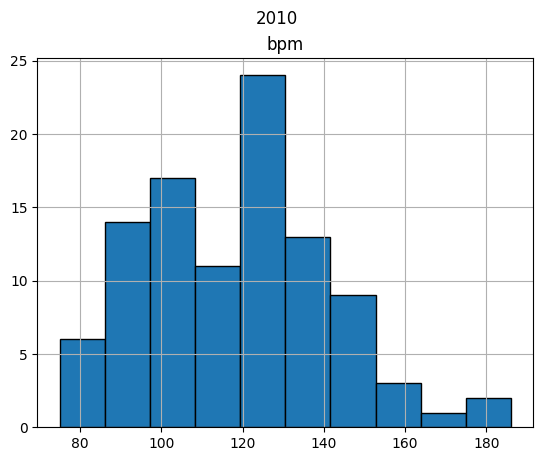

In [ ]:
# Histogramas preliminares

bpm_mean_vals = []
bpm_st_devs = []
bpm_mode_vals = []

for decade in decades:
  #eval("df"+decade)['bpm'].plot.kde()
  eval("df"+decade).hist(column = 'bpm', edgecolor = 'black')
  bpm_mean_vals.append(eval("df"+decade)['bpm'].mean())
  bpm_mode_vals.append(eval("df"+decade)['bpm'].mode()[0]) # mode() devuelve varias modas, me quedo con la primera
  
  bpm_st_devs.append(eval("df"+decade)['bpm'].std())
  np.mean(eval("df"+decade)['bpm'])
  plt.suptitle(decade)
  plt.show()

In [ ]:
def variable_plot(decades, variable, nombre_var):
  '''
  Grafica la media y moda de una variable a lo largo de las decádas.
  '''
  mean_vals = []
  mode_vals = []
  decades_list = [int(i) for i in decades]
  for decade in decades:
    mean_vals.append(eval("df"+decade)[variable].mean())
    mode_vals.append(eval("df"+decade)[variable].mode()[0]) # mode() devuelve varias modas, me quedo con la primera
  plt.plot(decades_list, mean_vals, color = 'darkred', label = 'Promedio')
  plt.plot(decades_list, mode_vals, color = 'darkblue', label = 'Moda')
  plt.ylabel(nombre_var)
  plt.xlabel("Década")
  plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
  plt.title(f"{nombre_var} a lo largo de las décadas")
  plt.legend()
  plt.show()

**bpm (tempo)**

Es el tempo global estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media del beat.

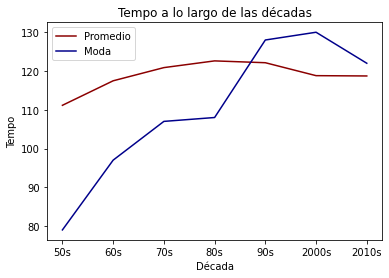

In [ ]:
variable_plot(decades, 'bpm', 'Tempo')

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

In [ ]:
variable_plot(decades, 'live', 'Liveness')

**Energía**

Representa una medida perceptual de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas y de intensidad alta. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. Las características de percepción que contribuyen a este atributo incluyen rango dinámico, volumen percibido, timbre, frecuencia de inicio y entropía general. 

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

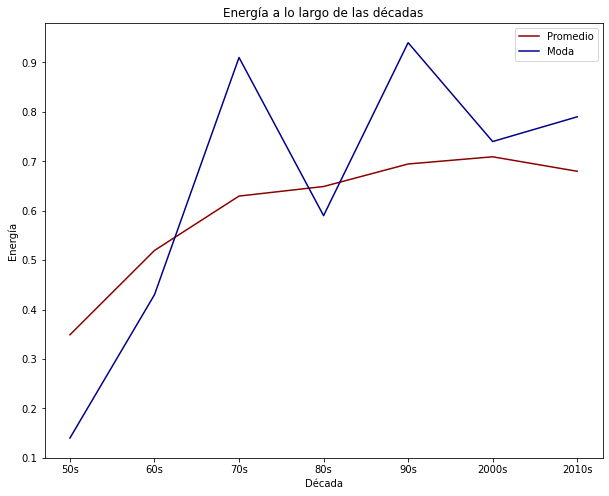

In [ ]:
variable_plot(decades, 'nrgy', 'Energía')

**Popularidad**

La popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones.
En términos generales, las canciones que se reproducen mucho ahora tendrán una mayor popularidad que las canciones que se tocaron mucho en el pasado.

In [ ]:
variable_plot(decades, 'pop', 'Popularidad')

**Acousticness**

Es una medida de confianza acerca de si la pista es acústica. Valores más altos significan una alta confianza en que la pista sea acústica.

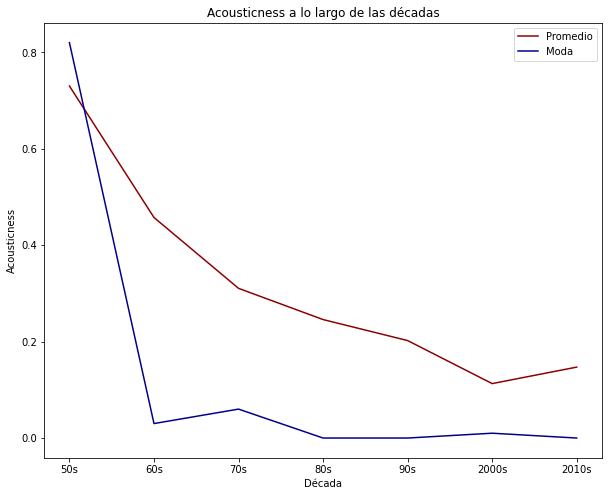

In [ ]:
variable_plot(decades, 'acous', 'Acousticness')

**Duración**


Duración de la canción en segundos.

In [ ]:
variable_plot(decades, 'dur', 'Duración (s)')

**Danceability (bailabilidad)** 

La bailabilidad describe qué tan adecuada es una pista para bailar en función de una combinación de elementos musicales que incluyen el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable.

In [ ]:
variable_plot(decades, 'dnce', 'Bailabilidad')

**Loudness (sonoridad)**

Es el volumen general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas. Los valores suelen oscilar entre -60 y 0 dB.

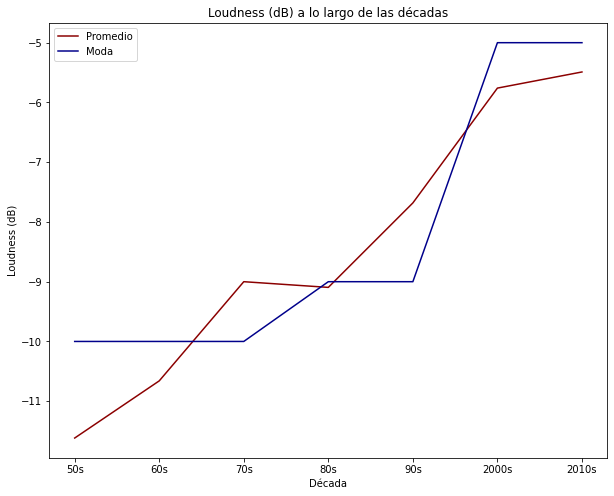

In [ ]:
variable_plot(decades, 'dB', 'Loudness (dB)')

**Speechiness**

Speechiness detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente parecida a un discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cercano a 1.0 será el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente estén compuestas en su totalidad por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0.33 probablemente representen música y otras pistas que no se parecen al habla

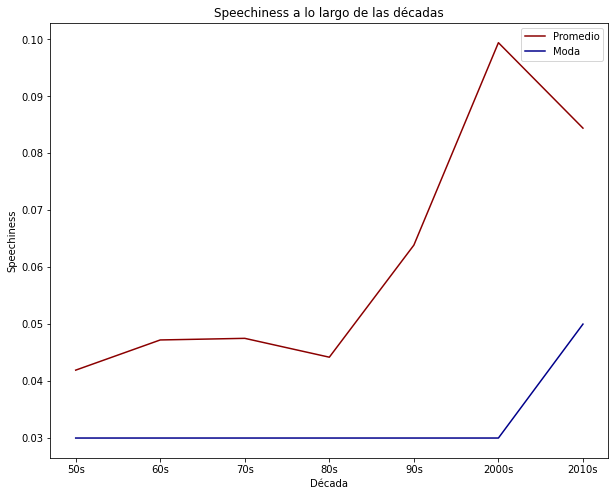

In [ ]:
variable_plot(decades, 'spch', 'Speechiness')

**Valence (positividad)**

Una medida de 0.0 a 1.0 que describe la positividad musical que transmite una pista. Las pistas con valencia alta suenan más positivas (p. Ej., Feliz, alegre, eufórico), mientras que las pistas con valencia baja suenan más negativas (p. Ej., Triste, deprimido, enojado).

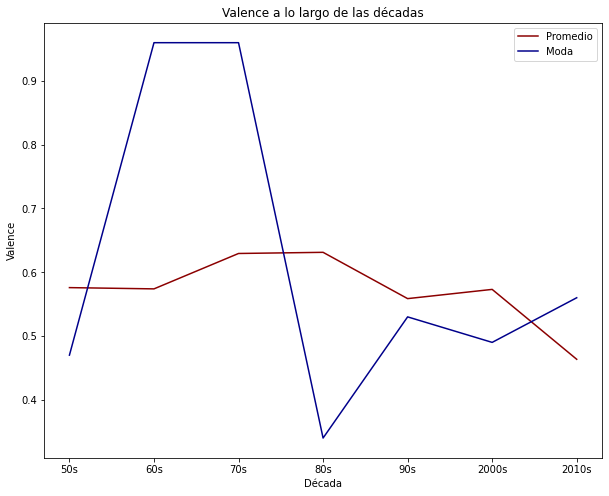

In [ ]:
variable_plot(decades, 'val', 'Valence')

Graficando todos los parámetros que toman valores entre 0 y 1 en simultáneo:

In [ ]:
def mean_variable_plot(decades, variable, nombre_var):
  '''
  Grafica la media y moda de una variable a lo largo de las decádas.
  '''
  mean_vals = []
  decades_list = [int(i) for i in decades]
  for decade in decades:
    mean_vals.append(eval("df"+decade)[variable].mean())
  plt.plot(decades_list,  mean_vals, label = nombre_var, linewidth=4)

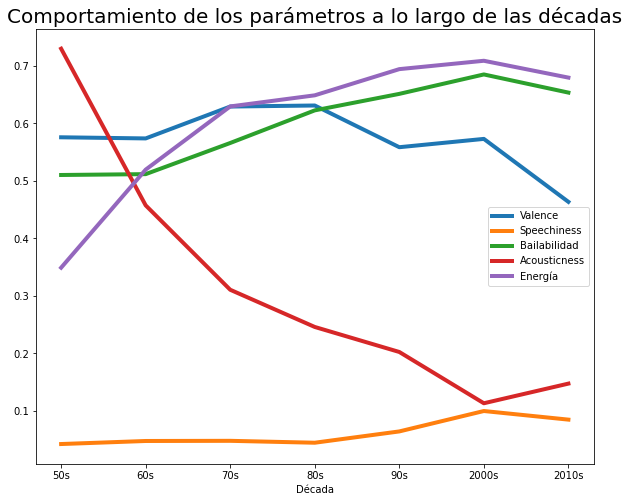

In [ ]:
decades_list = [int(i) for i in decades]

plt.rcParams["figure.figsize"] = (10,8)
mean_variable_plot(decades, 'val', 'Valence')
mean_variable_plot(decades, 'spch', 'Speechiness')
mean_variable_plot(decades, 'dnce', 'Bailabilidad')
mean_variable_plot(decades, 'acous', 'Acousticness')
#mean_variable_plot(decades, 'dB', 'Loudness (dB)')
#mean_variable_plot(decades, 'pop', 'Popularity')
#mean_variable_plot(decades, 'bpm', 'Tempo')
mean_variable_plot(decades, 'nrgy', 'Energía')
#mean_variable_plot(decades, 'dur', 'Duración (s)')

plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Comportamiento de los parámetros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

Normalizando para poder graficar todas las variables en simutáneo para ver el comportamiento cualitativo (si crece o decrece):

In [ ]:
def scaled_variable_plot(decades, variable, nombre_var):
  '''
  Grafica la media de una variable a lo largo de las decádas.
  '''
  mean_vals = []
  decades_list = [int(i) for i in decades]
  for decade in decades:
    mean_vals.append(eval("df"+decade)[variable].mean())
  plt.plot(decades_list, [(medias-min(mean_vals))/(max(mean_vals)-min(mean_vals)) for medias in mean_vals], label = nombre_var, linewidth=4)

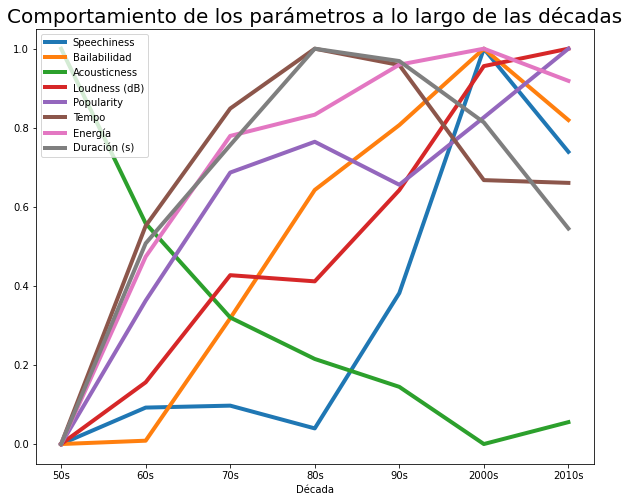

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

#scaled_variable_plot(decades, 'val', 'Valence') comportamiento random, lo sacamos para facilitar la visualización
scaled_variable_plot(decades, 'spch', 'Speechiness')
scaled_variable_plot(decades, 'dnce', 'Bailabilidad')
scaled_variable_plot(decades, 'acous', 'Acousticness')
scaled_variable_plot(decades, 'dB', 'Loudness (dB)')
scaled_variable_plot(decades, 'pop', 'Popularity')
scaled_variable_plot(decades, 'bpm', 'Tempo')
scaled_variable_plot(decades, 'nrgy', 'Energía')
scaled_variable_plot(decades, 'dur', 'Duración (s)')

plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Comportamiento de los parámetros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

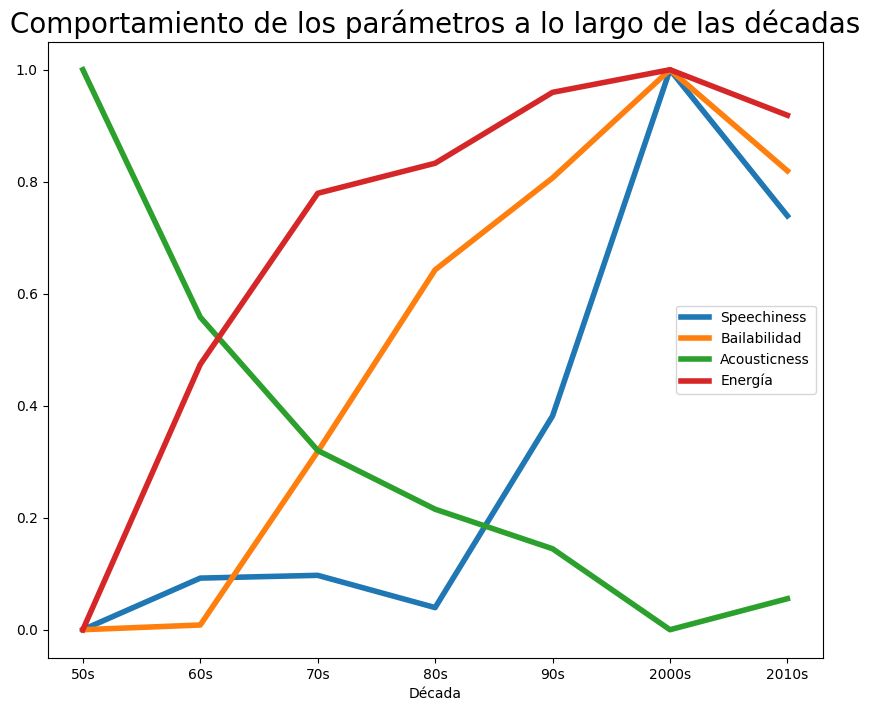

In [ ]:
decades_list = [int(i) for i in decades]
plt.rcParams["figure.figsize"] = (10,8)

#scaled_variable_plot(decades, 'val', 'Valence') comportamiento random, lo sacamos para facilitar la visualización
scaled_variable_plot(decades, 'spch', 'Speechiness')
scaled_variable_plot(decades, 'dnce', 'Bailabilidad')
scaled_variable_plot(decades, 'acous', 'Acousticness')
#scaled_variable_plot(decades, 'dB', 'Loudness (dB)')
#scaled_variable_plot(decades, 'pop', 'Popularity')
#scaled_variable_plot(decades, 'bpm', 'Tempo')
scaled_variable_plot(decades, 'nrgy', 'Energía')
#scaled_variable_plot(decades, 'dur', 'Duración (s)')

plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Comportamiento de los parámetros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.savefig('/content/gdrive/My Drive/params4.png', bbox_inches = 'tight')
files.download('/content/gdrive/My Drive/params4.png')
plt.show()

## Evolución de los géneros a través de las décadas (pre-datacuration)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

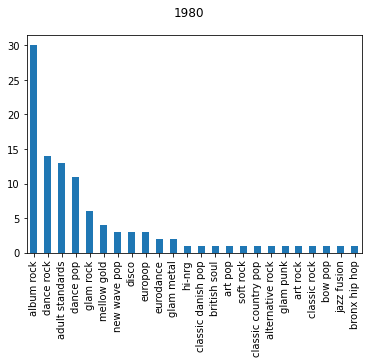

In [ ]:
# Para tener un grafico bonito y no pixelado
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')
eval("df1980")['top genre'].value_counts().plot(kind='bar')
plt.suptitle("1980")
plt.savefig('/content/gdrive/My Drive/histograma.png', bbox_inches = 'tight')
files.download('/content/gdrive/My Drive/histograma.png')
plt.show()

Estos son todos los géneros:

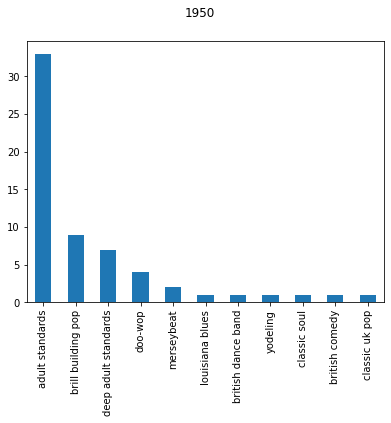

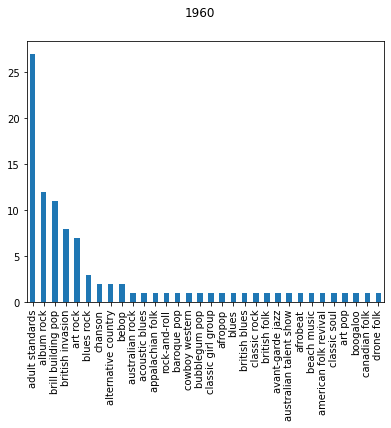

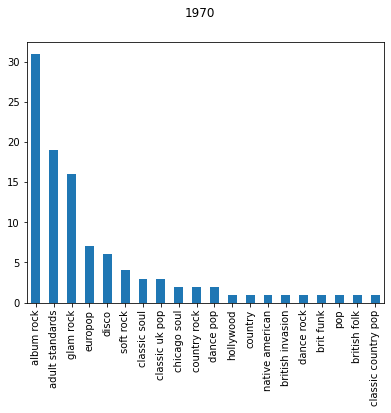

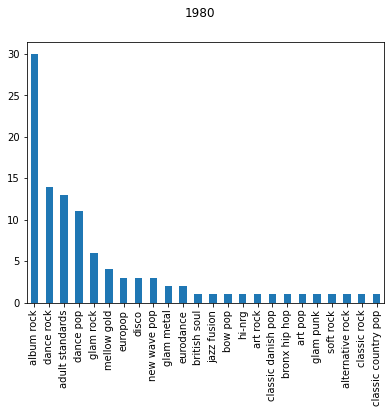

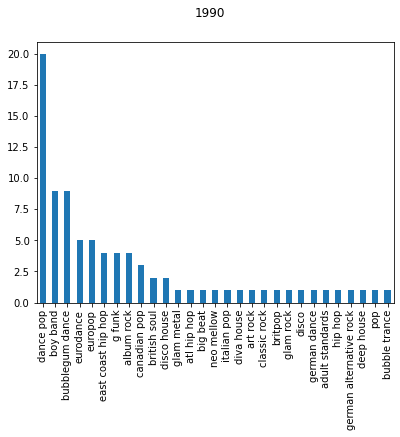

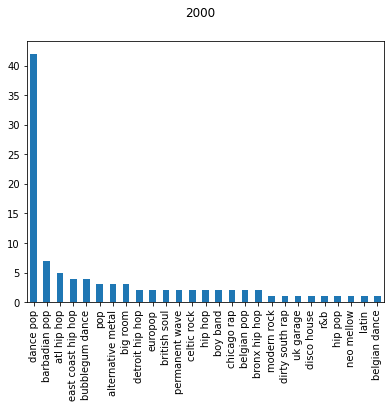

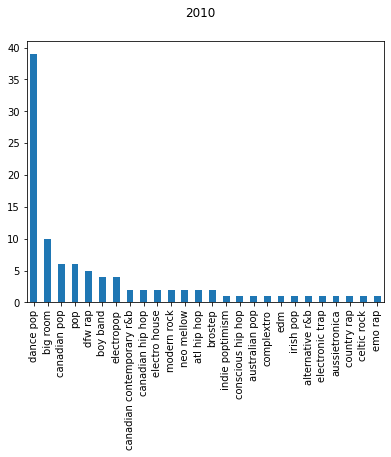

In [ ]:
plt.rcParams["figure.figsize"] = (6.4,4.8) #original size
for decade in decades:
  eval("df"+decade)['top genre'].value_counts().plot(kind='bar')
  plt.suptitle(decade)
  plt.show()

Para ver como es el set de datos anual de 1921 a 2020. 
No tiene la clasificación según el género, podríamos clasificarla utilizando como training set el set de décadas y luego ver la evolución temporal.

Add a decade column because "year" is not the year of the original song

In [ ]:
for decade in decades:
  eval("df"+decade)['decade']= int(decade)

**merge datasets by decades into one data frame**

In [ ]:
df_all_decades = pd.concat([df1950,df1960,df1970,df1980,df1990,df2000, df2010])
df_all_decades.tail()

Number                              title  ... pop decade
95      96  Stereo Hearts (feat. Adam Levine)  ...  56   2010
96      97                           Dynamite  ...  56   2010
97      98                   Break Your Heart  ...  54   2010
98      99                         Summer Air  ...  43   2010
99     100                     All I Wanna Do  ...  32   2010

[5 rows x 16 columns]

Estos son todos los géneros:

In [ ]:
all_genres = set(df_all_decades['top genre'])
all_genres

{'acoustic blues',
 'adult standards',
 'afrobeat',
 'afropop',
 'album rock',
 'alternative country',
 'alternative metal',
 'alternative r&b',
 'alternative rock',
 'american folk revival',
 'appalachian folk',
 'art pop',
 'art rock',
 'atl hip hop',
 'aussietronica',
 'australian pop',
 'australian rock',
 'australian talent show',
 'avant-garde jazz',
 'barbadian pop',
 'baroque pop',
 'beach music',
 'bebop',
 'belgian dance',
 'belgian pop',
 'big beat',
 'big room',
 'blues',
 'blues rock',
 'boogaloo',
 'bow pop',
 'boy band',
 'brill building pop',
 'brit funk',
 'british blues',
 'british comedy',
 'british dance band',
 'british folk',
 'british invasion',
 'british soul',
 'britpop',
 'bronx hip hop',
 'brostep',
 'bubble trance',
 'bubblegum dance',
 'bubblegum pop',
 'canadian contemporary r&b',
 'canadian folk',
 'canadian hip hop',
 'canadian pop',
 'celtic rock',
 'chanson',
 'chicago rap',
 'chicago soul',
 'classic country pop',
 'classic danish pop',
 'classic girl

In [ ]:
#Remove nan
df_all_decades_filter = df_all_decades.dropna(subset = ['top genre'])

## Standarization of genres: all pop, all hip hop, ...

In [ ]:
# Para sacar el warning de operaciones en cadena
pd.options.mode.chained_assignment = None  # default='warn' 

In [ ]:
#blues
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('blues'), 'top genre'] = 'blues'

#pop
df_all_decades_filter['top genre'].replace(dict.fromkeys(['art pop', 'australian pop', 'barbadian pop', 'baroque pop', 'belgian pop'
                                                          'bow pop', 'brill building pop', 'british comedy', 'british dance band', 
                                                          'bubblegum dance', 'bubblegum pop', 'canadian pop', 'chanson', 'classic danish pop', 
                                                          'classic uk pop', 'europop', 'hollywood', 'indie poptimism', 'italian pop', 
                                                          'irish pop', 'hollywood', 'indie poptimism', 'merseybeat', 'new wave pop',
                                                          'yodeling'],
                                                          'pop'), inplace=True)


df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('boy band'), 'top genre'] = 'dance pop'


#hip hop

# Rap y hip hop refieren a lo mismo. Rap es el estilo de cantar, hip hop la música/cultura
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('hip hop'), 'top genre'] = 'hip hop'
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('rap'), 'top genre'] = 'hip hop'

# Quedaron algunos sin considerar en la limpieza del renglón anterior
df_all_decades_filter['top genre'].replace(dict.fromkeys(['atl hip hip', 'bronx hip hop', 'canadian hip hop', 'chicago rap', 
                                                          'conscious hip hop', 'detroit hip hop', 'dfw rap', 'dirty south rap',
                                                          'east coast hip hop', 'emo rap', 'g funk', 'hip pop'], 
                                                          'hip hop'), inplace=True)


# electronic
df_all_decades_filter['top genre'].replace(dict.fromkeys(['brostep', 'bubble trance', 'complextro', 'deep house', 
                                                          'edm', 'electro house', 'electropop', 'aussietronica', 
                                                          'uk garage', 'big room', 'big beat', 'eurodance', 'diva house',
                                                          'disco house', 'belgian dance', 'hi-nrg', 'german dance'],
                                                          'electronic'), inplace=True)
# rock
df_all_decades_filter['top genre'].replace(dict.fromkeys(['album rock', 'australian rock', 'blues rock', 'glam rock', 'mellow gold',
                                                          'soft rock', 'rock-and-roll', 'classic rock', 'british invasion',
                                                          'australian talent show', 'permanent wave', 'art rock', 'neo mellow'],
                                                          'rock'), inplace=True)
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('glam'), 'top genre'] = 'rock'

# soul
df_all_decades_filter['top genre'].replace(dict.fromkeys(['chicago soul', 'british soul', 'classic soul', 'classic girl group'],
                                                          'soul'), inplace=True)
# jazz
df_all_decades_filter['top genre'].replace(dict.fromkeys(['bebop', 'avant-garde jazz', 'jazz fusion', 'afropop'],
                                                          'jazz'), inplace=True)
# r&b
df_all_decades_filter['top genre'].replace(dict.fromkeys(['alternative r&b', 'beach music', 'boogaloo', 'canadian contemporary r&b',
                                                          'doo wop', 'doo-wop'],
                                                          'r&b'), inplace=True)
# folk
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('folk'), 'top genre'] = 'folk'


# country
df_all_decades_filter['top genre'].replace(dict.fromkeys(['alternative country', 'country rap', 'classic country pop', 'country rock', 'cowboy western'],
                                                         'folk'), inplace=True)
# funk
df_all_decades_filter['top genre'].replace(dict.fromkeys(['native american', 'brit funk', 'afrobeat'],
                                                         'funk'), inplace=True)

# alternative rock
df_all_decades_filter['top genre'].replace(dict.fromkeys(['britpop', 'celtic rock', 'german alternative rock', 'modern rock'],
                                                          'alternative rock'), inplace=True)
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('alternative'), 'top genre'] = 'alternative rock'


# Para corregir los que se llaman "adult standards" 
df_all_decades_filter.loc[df_all_decades_filter['top genre'].str.contains('adult standards'), 'top genre'] = 'adult standards'

In [ ]:
# Los géneros que quedan después de la limpieza
set(df_all_decades_filter['top genre'])

{'adult standards',
 'alternative rock',
 'blues',
 'country',
 'dance pop',
 'dance rock',
 'disco',
 'electronic',
 'folk',
 'funk',
 'hip hop',
 'jazz',
 'latin',
 'pop',
 'r&b',
 'rock',
 'soul'}

In [ ]:
# Para tener una idea de qué artistas hay en "adult standards":
set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])

{'Al Martino',
 'Ambrosia',
 'Barbra Streisand',
 'Barry Manilow',
 'Bee Gees',
 'Billy Eckstine',
 'Billy Fury',
 'Bobby Goldsboro',
 'Bobby Vee',
 'Bread',
 'Brian Hyland',
 'Buddy Holly',
 'Carpenters',
 'Chicago',
 'Christopher Cross',
 'Commodores',
 'Connie Francis',
 'David Whitfield',
 'Dean Martin',
 'Diana Ross',
 'Dion & The Belmonts',
 'Dionne Warwick',
 'Doris Day',
 'Duke Ellington',
 'Ella Fitzgerald',
 'Elvis Presley',
 'England Dan',
 'Eric Carmen',
 'Four Tops',
 'Frank Sinatra',
 'Frankie Valli',
 'Frankie Valli & The Four Seasons',
 'Gary Lewis & The Playboys',
 'Gary Puckett & The Union Gap',
 'Gerry & The Pacemakers',
 'Gladys Knight & The Pips',
 'Helen Shapiro',
 'James Darren',
 'Jimmy Young',
 'John Denver',
 'Johnny Tillotson',
 'Leo Sayer',
 'Lionel Richie',
 'Louis Prima',
 'Michael Bolton',
 'Nat King Cole',
 'Neil Diamond',
 'Neil Sedaka',
 'Pat Boone',
 'Patsy Cline',
 'Patti Austin',
 'Paul Anka',
 'Peabo Bryson',
 'Peter Cetera',
 'Ricky Nelson',
 'Rod

In [ ]:
# Corrijo estos a mano porque conozco qué género les corresponde
df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains('Bee Gees'), 'top genre'] = 'disco'
df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains('Barbra Streisand'), 'top genre'] = 'pop'
df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains('Diana Ross'), 'top genre'] = 'soul'

In [ ]:
# Veamos el dataset con los géneros para saber el nombre de las columnas que necesitamos
df_genre

Unnamed: 0           artist_name  ...       topic       age
0               0                mukesh  ...     sadness  1.000000
1               4         frankie laine  ...  world/life  1.000000
2               6           johnnie ray  ...       music  1.000000
3              10           pérez prado  ...    romantic  1.000000
4              12  giorgos papadopoulos  ...    romantic  1.000000
...           ...                   ...  ...         ...       ...
28367       82447               mack 10  ...     obscene  0.014286
28368       82448                m.o.p.  ...     obscene  0.014286
28369       82449                  nine  ...     obscene  0.014286
28370       82450            will smith  ...     obscene  0.014286
28371       82451                 jeezy  ...     obscene  0.014286

[28372 rows x 31 columns]

In [ ]:
artists_to_fix = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
artists_genres = {}
for artist in artists_to_fix:
  artists_genres[artist] = df_genre[df_genre['artist_name'] == artist.lower()]['genre'].mode()

for artist in artists_to_fix:
  try:
    genre = artists_genres[artist][0]
    df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains(artist), 'top genre'] = str(genre)
  except:
    continue

In [ ]:
# Veamos si el dataset df_genre tenía a todos los artistas que nos faltaban etiquetar
set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])

{'Bobby Goldsboro',
 'David Whitfield',
 'Frank Sinatra',
 'James Darren',
 'Jimmy Young',
 'Rusty Draper',
 'Tab Hunter',
 'Teresa Brewer',
 'The Hilltoppers',
 'Tommy Edwards',
 'Tommy Roe'}

In [ ]:
# No, se ve que la tortura no termina. Lo terminamos manualmente entonces
# Arreglado! al fin!!
still_not_fixed = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
genres = ['folk', 'pop', 'jazz', 'pop', 'pop', 'folk', 'pop', 'pop', 'pop', 'r&b', 'pop']

for artist, genre in zip(list(still_not_fixed), genres):
  try:
    df_all_decades_filter.loc[df_all_decades_filter['artist'].str.contains(artist), 'top genre'] = genre
  except:
    continue

In [ ]:
still_not_fixed = set(df_all_decades_filter[df_all_decades_filter['top genre']=='adult standards']['artist'])
still_not_fixed

set()

## Evolución de los géneros a través de las décadas (post-datacuration)

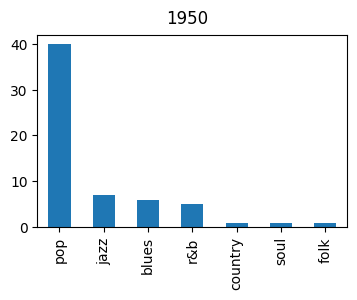

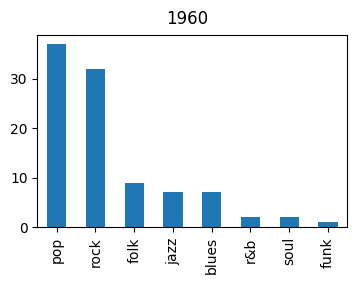

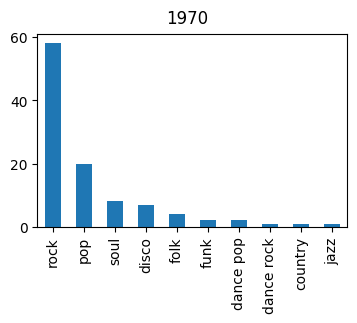

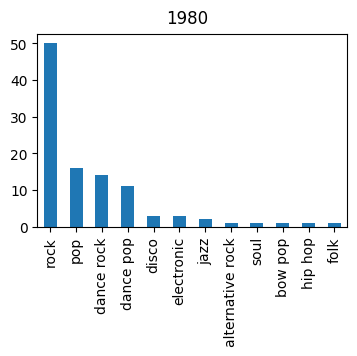

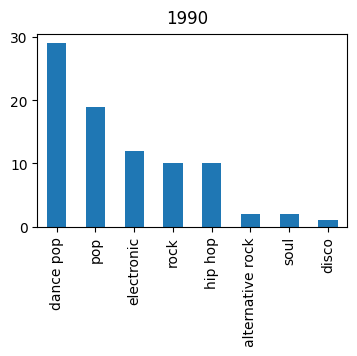

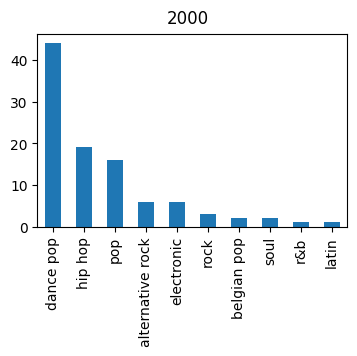

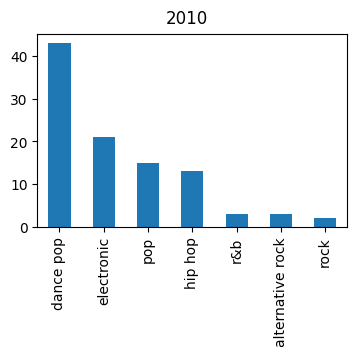

In [ ]:
plt.rcParams["figure.figsize"] = (4, 2.5) #original size

generos_counts = []
for decade in decades:
  df_all_decades_filter[df_all_decades_filter['decade'] == int(decade)]['top genre'].value_counts().plot(kind='bar')
  generos_counts.append(df_all_decades_filter[df_all_decades_filter['decade'] == int(decade)]['top genre'].value_counts(normalize = True))
  plt.suptitle(decade)
  plt.show()

In [ ]:
def frecuencia_genero(genero):
  genero_frec = []
  for i in range(len(decades)):
    try:
      genero_frec.append(generos_counts[i][genero])
    except KeyError:
      genero_frec.append(0)
  plt.plot(decades_list, genero_frec, label = genero, linewidth=3, alpha=1.)

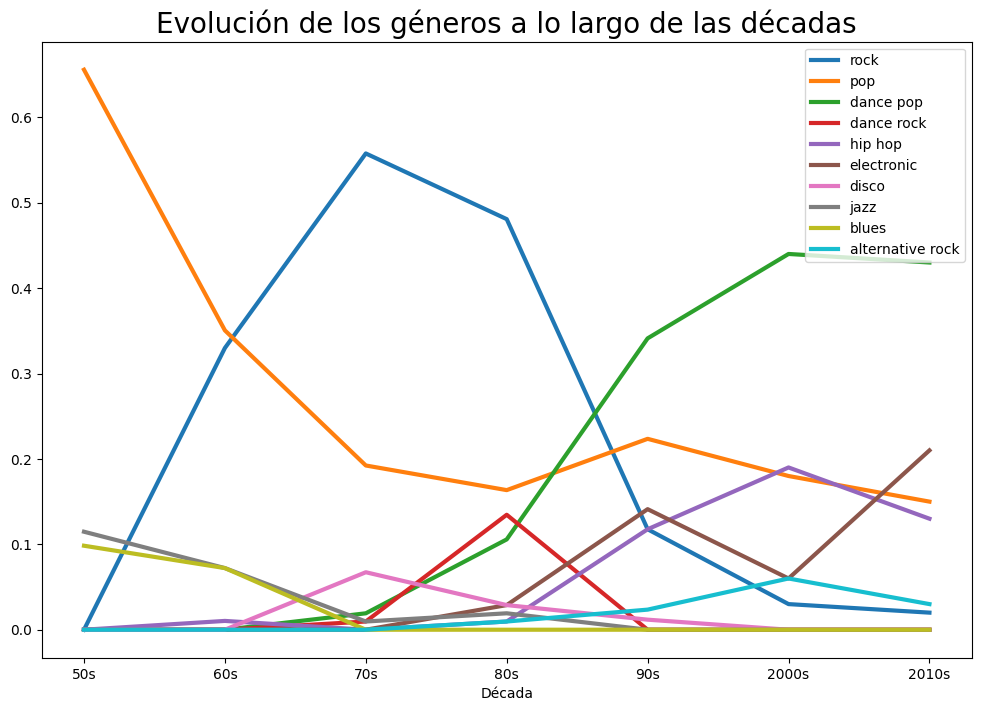

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)

frecuencia_genero('rock')
frecuencia_genero('pop')
frecuencia_genero('dance pop')
frecuencia_genero('dance rock')
frecuencia_genero('hip hop')
frecuencia_genero('electronic')
frecuencia_genero('disco')
frecuencia_genero('jazz')
frecuencia_genero('blues')
#frecuencia_genero('folk')
#frecuencia_genero('country')
frecuencia_genero('alternative rock')



plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Evolución de los géneros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

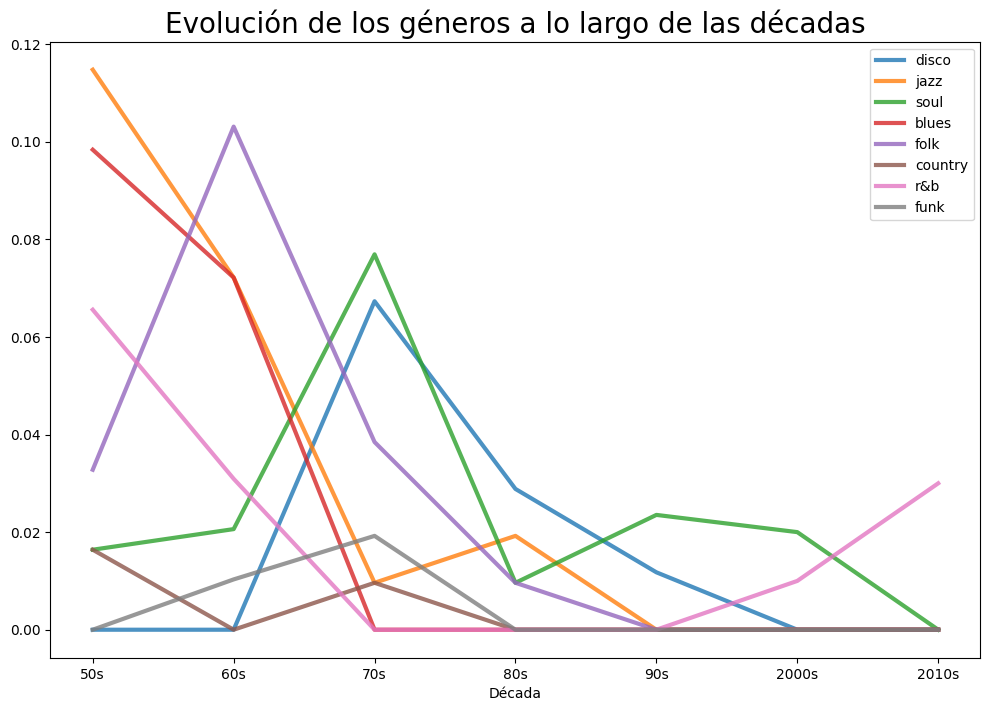

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)

frecuencia_genero('disco')
frecuencia_genero('jazz')
frecuencia_genero('soul')
frecuencia_genero('blues')
frecuencia_genero('folk')
frecuencia_genero('country')
frecuencia_genero('r&b')
frecuencia_genero('funk')


plt.xlabel("Década")
plt.xticks(decades_list, ['50s', '60s', '70s', '80s', '90s', '2000s', '2010s'])
plt.title(f"Evolución de los géneros a lo largo de las décadas", fontsize=20)
plt.legend()
plt.show()

## Matriz de correlación

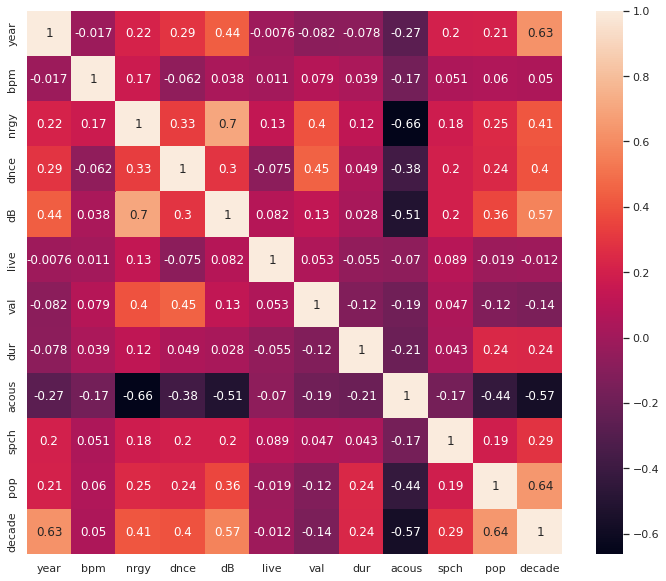

In [ ]:
corr_matrix = df_all_decades_filter.corr()
sns.set(rc = {'figure.figsize':(12,10)})
corr_matrix = corr_matrix.drop(['Number']).drop(['Number'],axis=1)
sns.heatmap(corr_matrix, annot=True)

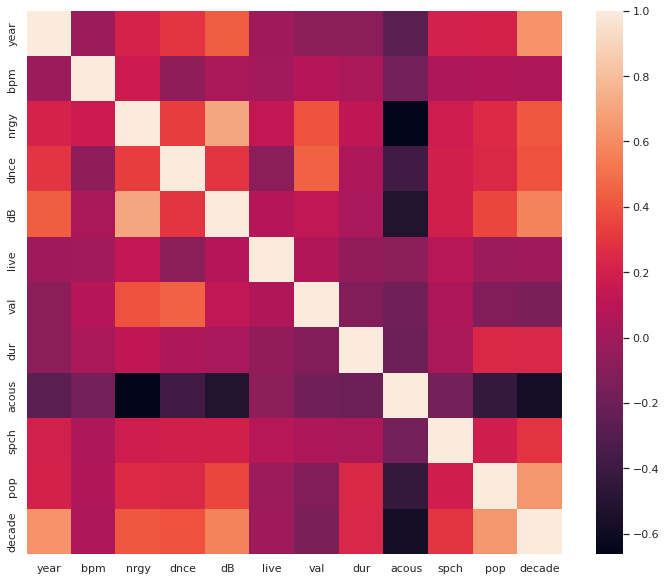

In [ ]:
# sin coef correlación
sns.heatmap(corr_matrix)

In [ ]:
genres_plot = ['rock', 'pop', 'electronic']
df_all_decades_filter['top genre'].value_counts()


rock                131
dance pop           114
pop                  98
adult standards      60
hip hop              44
electronic           36
dance rock           15
soul                 12
disco                10
art rock              9
country               8
blues                 6
folk                  6
r&b                   5
jazz                  4
neo mellow            4
metal                 3
alternative rock      3
disco house           3
celtic rock           3
new wave pop          3
permanent wave        2
chanson               2
german dance          1
afrobeat              1
hi-nrg                1
native american       1
afropop               1
latin                 1
boogaloo              1
brit funk             1
belgian dance         1
Name: top genre, dtype: int64

## Visualización utilizando reducción de dimensionalidad

**1. Análisis de componentes principales (PCA)**

Técnica de reducción de dimensiones lineal

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val',	'dur',	'acous', 'spch', 'pop']
# Separating out the features
x = df_all_decades_filter.loc[:, features].values
# Separating out the target
y = df_all_decades_filter.loc[:,['top genre']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
final_df = pd.concat([principalDf, pd.DataFrame(y)], axis = 1)
final_df = final_df.rename({'principal component 1':'PC1', 'principal component 2':'PC2', 0:'genre'}, axis=1)  

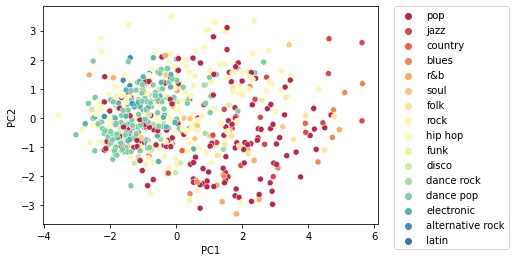

In [ ]:
np.random.seed(1974)
sns.scatterplot(x="PC1", y="PC2", data=final_df, hue='genre', palette='Spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**2. tSNE**

Técnica no lineal

In [ ]:
!pip install scprep

     |████████████████████████████████| 104 kB 7.8 MB/s 


In [ ]:
import sklearn.manifold
import scprep

In [ ]:
tsne_op = sklearn.manifold.TSNE()
data_tsne = tsne_op.fit_transform(final_df[['PC1','PC2']])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


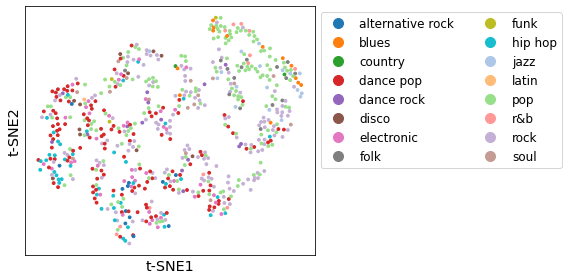

In [ ]:
scprep.plot.scatter2d(data_tsne, c=final_df[['genre']],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

## Visualización con Seaborn

Veamos cuan parecidos/distintos eran algunos pares de géneros en distintas décadas. Para ello, vamos a utilizar **pairplot** de Seaborn

Tambien va de la mano con la idea de ver si se puede entrenar una red neuronal para distinguir géneros con este dataset

**Empezamos primero comparando con el set de datos usado antes (que recordemos que tenía separados algunos subgéneros del rock y pop)**

In [ ]:
options = ['pop', 'rock', 'blues']
#columns_sel = ['bpm', 'pop', 'decade', 'dur', 'nrgy', 'top genre']
columns_sel = ['bpm', 'pop', 'decade', 'dur', 'nrgy', 'dnce', 'top genre']
all_decades_subset = df_all_decades_filter[df_all_decades_filter['top genre'].isin(options)][ columns_sel ]
all_decades_subset

bpm  pop  decade  dur  nrgy  dnce top genre
0   116   72    1950  155  0.34  0.55       pop
3    82   60    1950  151  0.43  0.49       pop
4    79   60    1950  158  0.38  0.56       pop
6   102   56    1950  164  0.41  0.29       pop
7   123   55    1950  143  0.36  0.74       pop
..  ...  ...     ...  ...   ...   ...       ...
57   84   76    2010  211  0.77  0.51       pop
58  126   76    2010  217  0.45  0.68      rock
61  105   75    2010  189  0.73  0.74       pop
64   99   75    2010  211  0.56  0.40       pop
74  140   72    2010  229  0.87  0.57       pop

[333 rows x 7 columns]

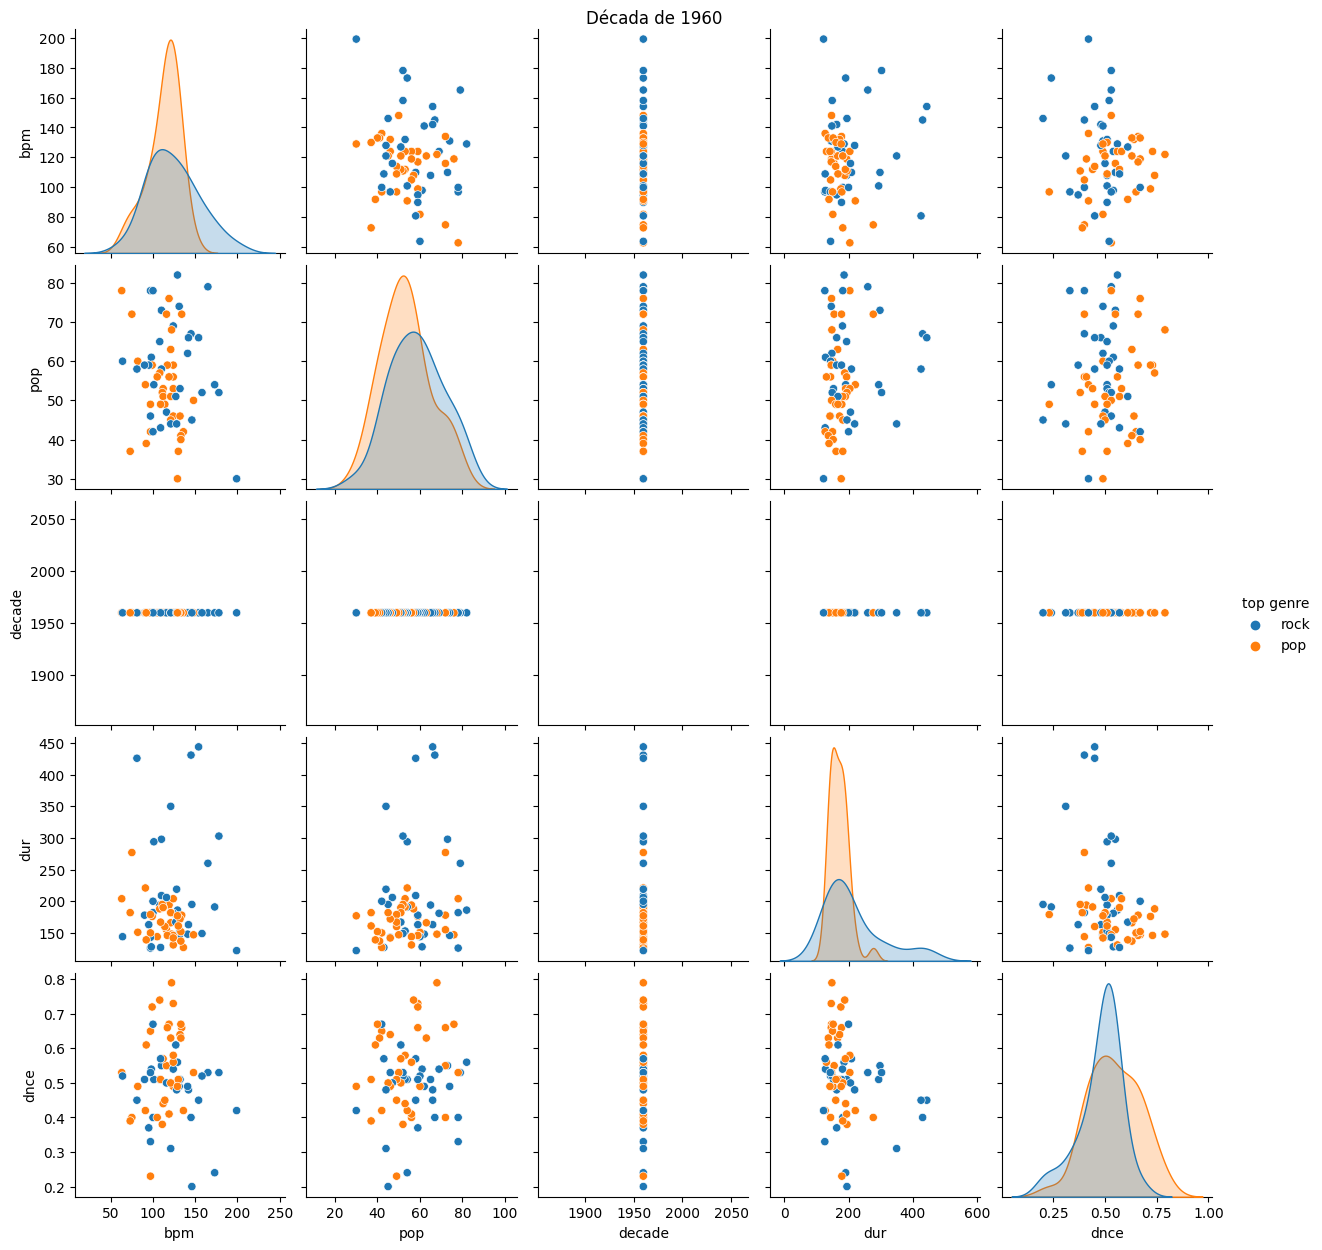

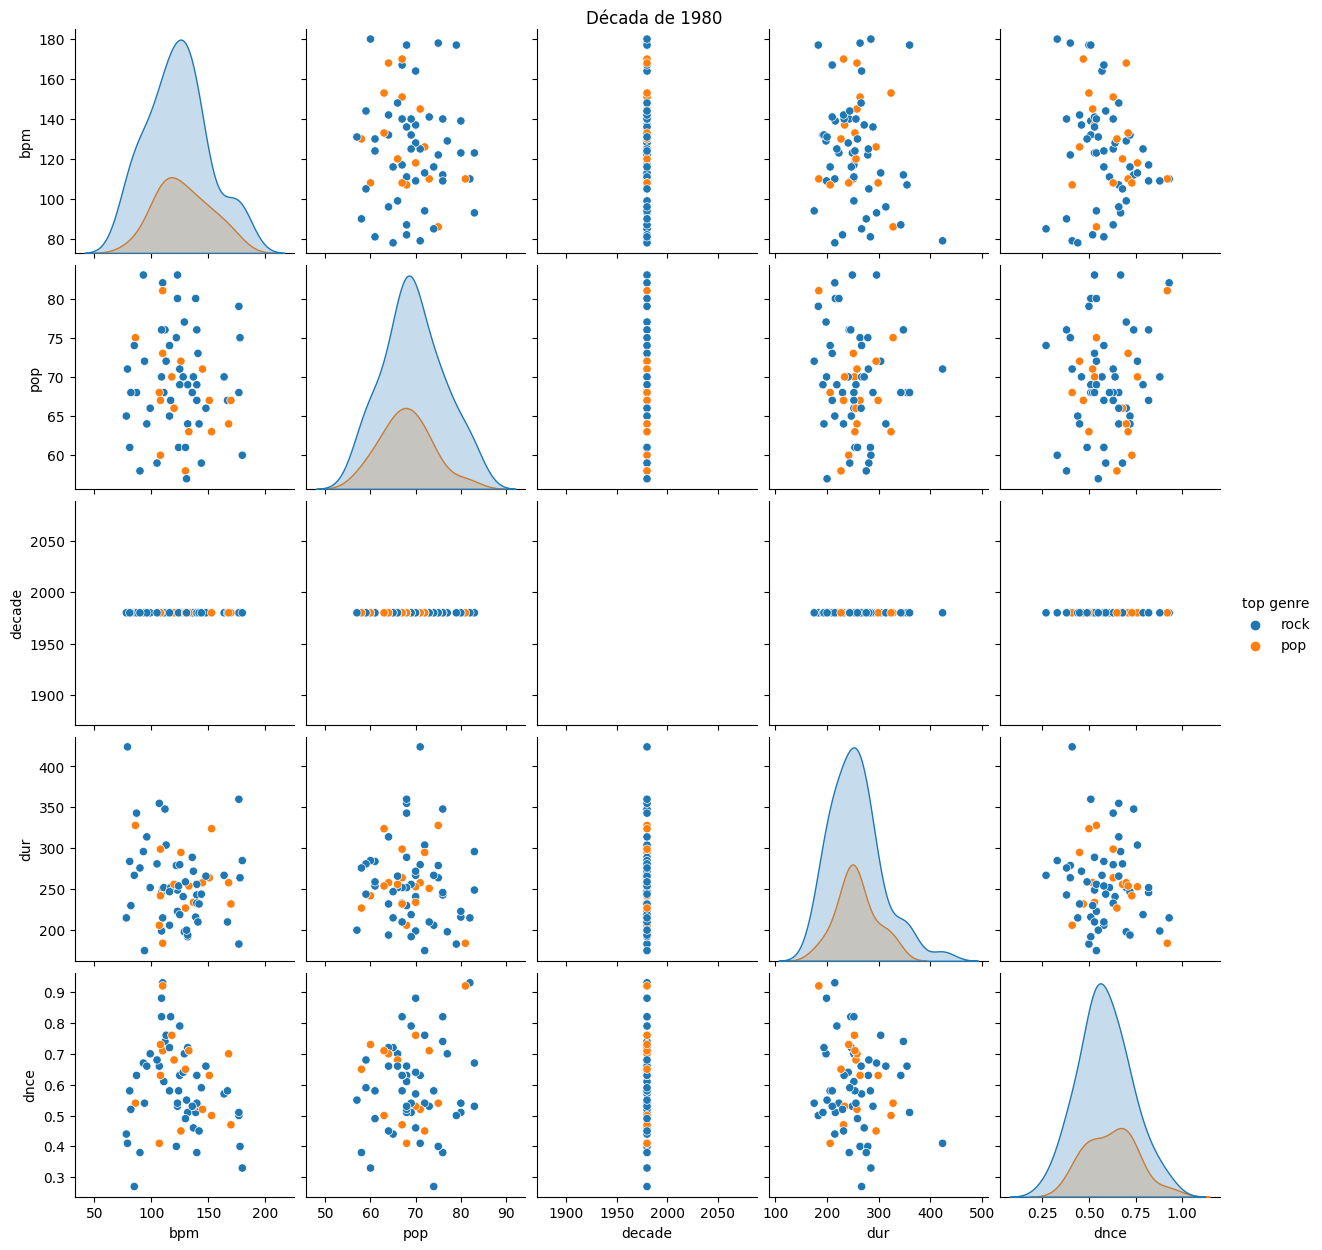

In [ ]:
some_decades = [1960, 1980, 2010]
for decade in some_decades:
  dataframe = all_decades_subset[all_decades_subset['decade'] == decade]
  graph = sns.pairplot(data = dataframe, hue = 'top genre')
  graph.fig.suptitle(f'Década de {decade}', y=1)

In [ ]:
decade = 1960
dataframe = all_decades_subset[all_decades_subset['decade'] == decade]
graph = sns.pairplot(data = dataframe, hue = 'top genre')
graph.fig.suptitle(f'Década de {decade}', y=1)
#plt.savefig('/content/gdrive/My Drive/paiplot'+str(decade)+'.png', bbox_inches = 'tight')
#files.download('/content/gdrive/My Drive/paiplot'+str(decade)+'.png')
#plt.show()

Text(0.5, 1, 'Década de 1960')

Ahora si, vamos a juntar los subgéneros del rock y pop

In [ ]:
all_decades_modified = df_all_decades_filter.copy()
all_decades_modified.loc[all_decades_modified['top genre'].str.contains('pop'), 'top genre'] = 'pop'
all_decades_modified.loc[all_decades_modified['top genre'].str.contains('rock'), 'top genre'] = 'rock'

In [ ]:
options = ['pop', 'electronic']
columns_sel = ['bpm', 'pop', 'decade', 'dur', 'nrgy', 'dnce', 'top genre', 'acous', 'spch']
all_decades_modified = all_decades_modified[all_decades_modified['top genre'].isin(options)][ columns_sel ]
all_decades_modified

bpm  pop  decade  dur  nrgy  dnce   top genre  acous  spch
0   116   72    1950  155  0.34  0.55         pop   0.75  0.03
3    82   60    1950  151  0.43  0.49         pop   0.70  0.06
4    79   60    1950  158  0.38  0.56         pop   0.67  0.03
6   102   56    1950  164  0.41  0.29         pop   0.66  0.03
7   123   55    1950  143  0.36  0.74         pop   0.67  0.03
..  ...  ...     ...  ...   ...   ...         ...    ...   ...
95   90   56    2010  211  0.80  0.65         pop   0.03  0.10
96  120   56    2010  203  0.79  0.76         pop   0.00  0.08
97  122   54    2010  185  0.89  0.67         pop   0.00  0.03
98  102   43    2010  184  0.75  0.76         pop   0.06  0.07
99  112   32    2010  194  0.79  0.73  electronic   0.16  0.07

[336 rows x 9 columns]

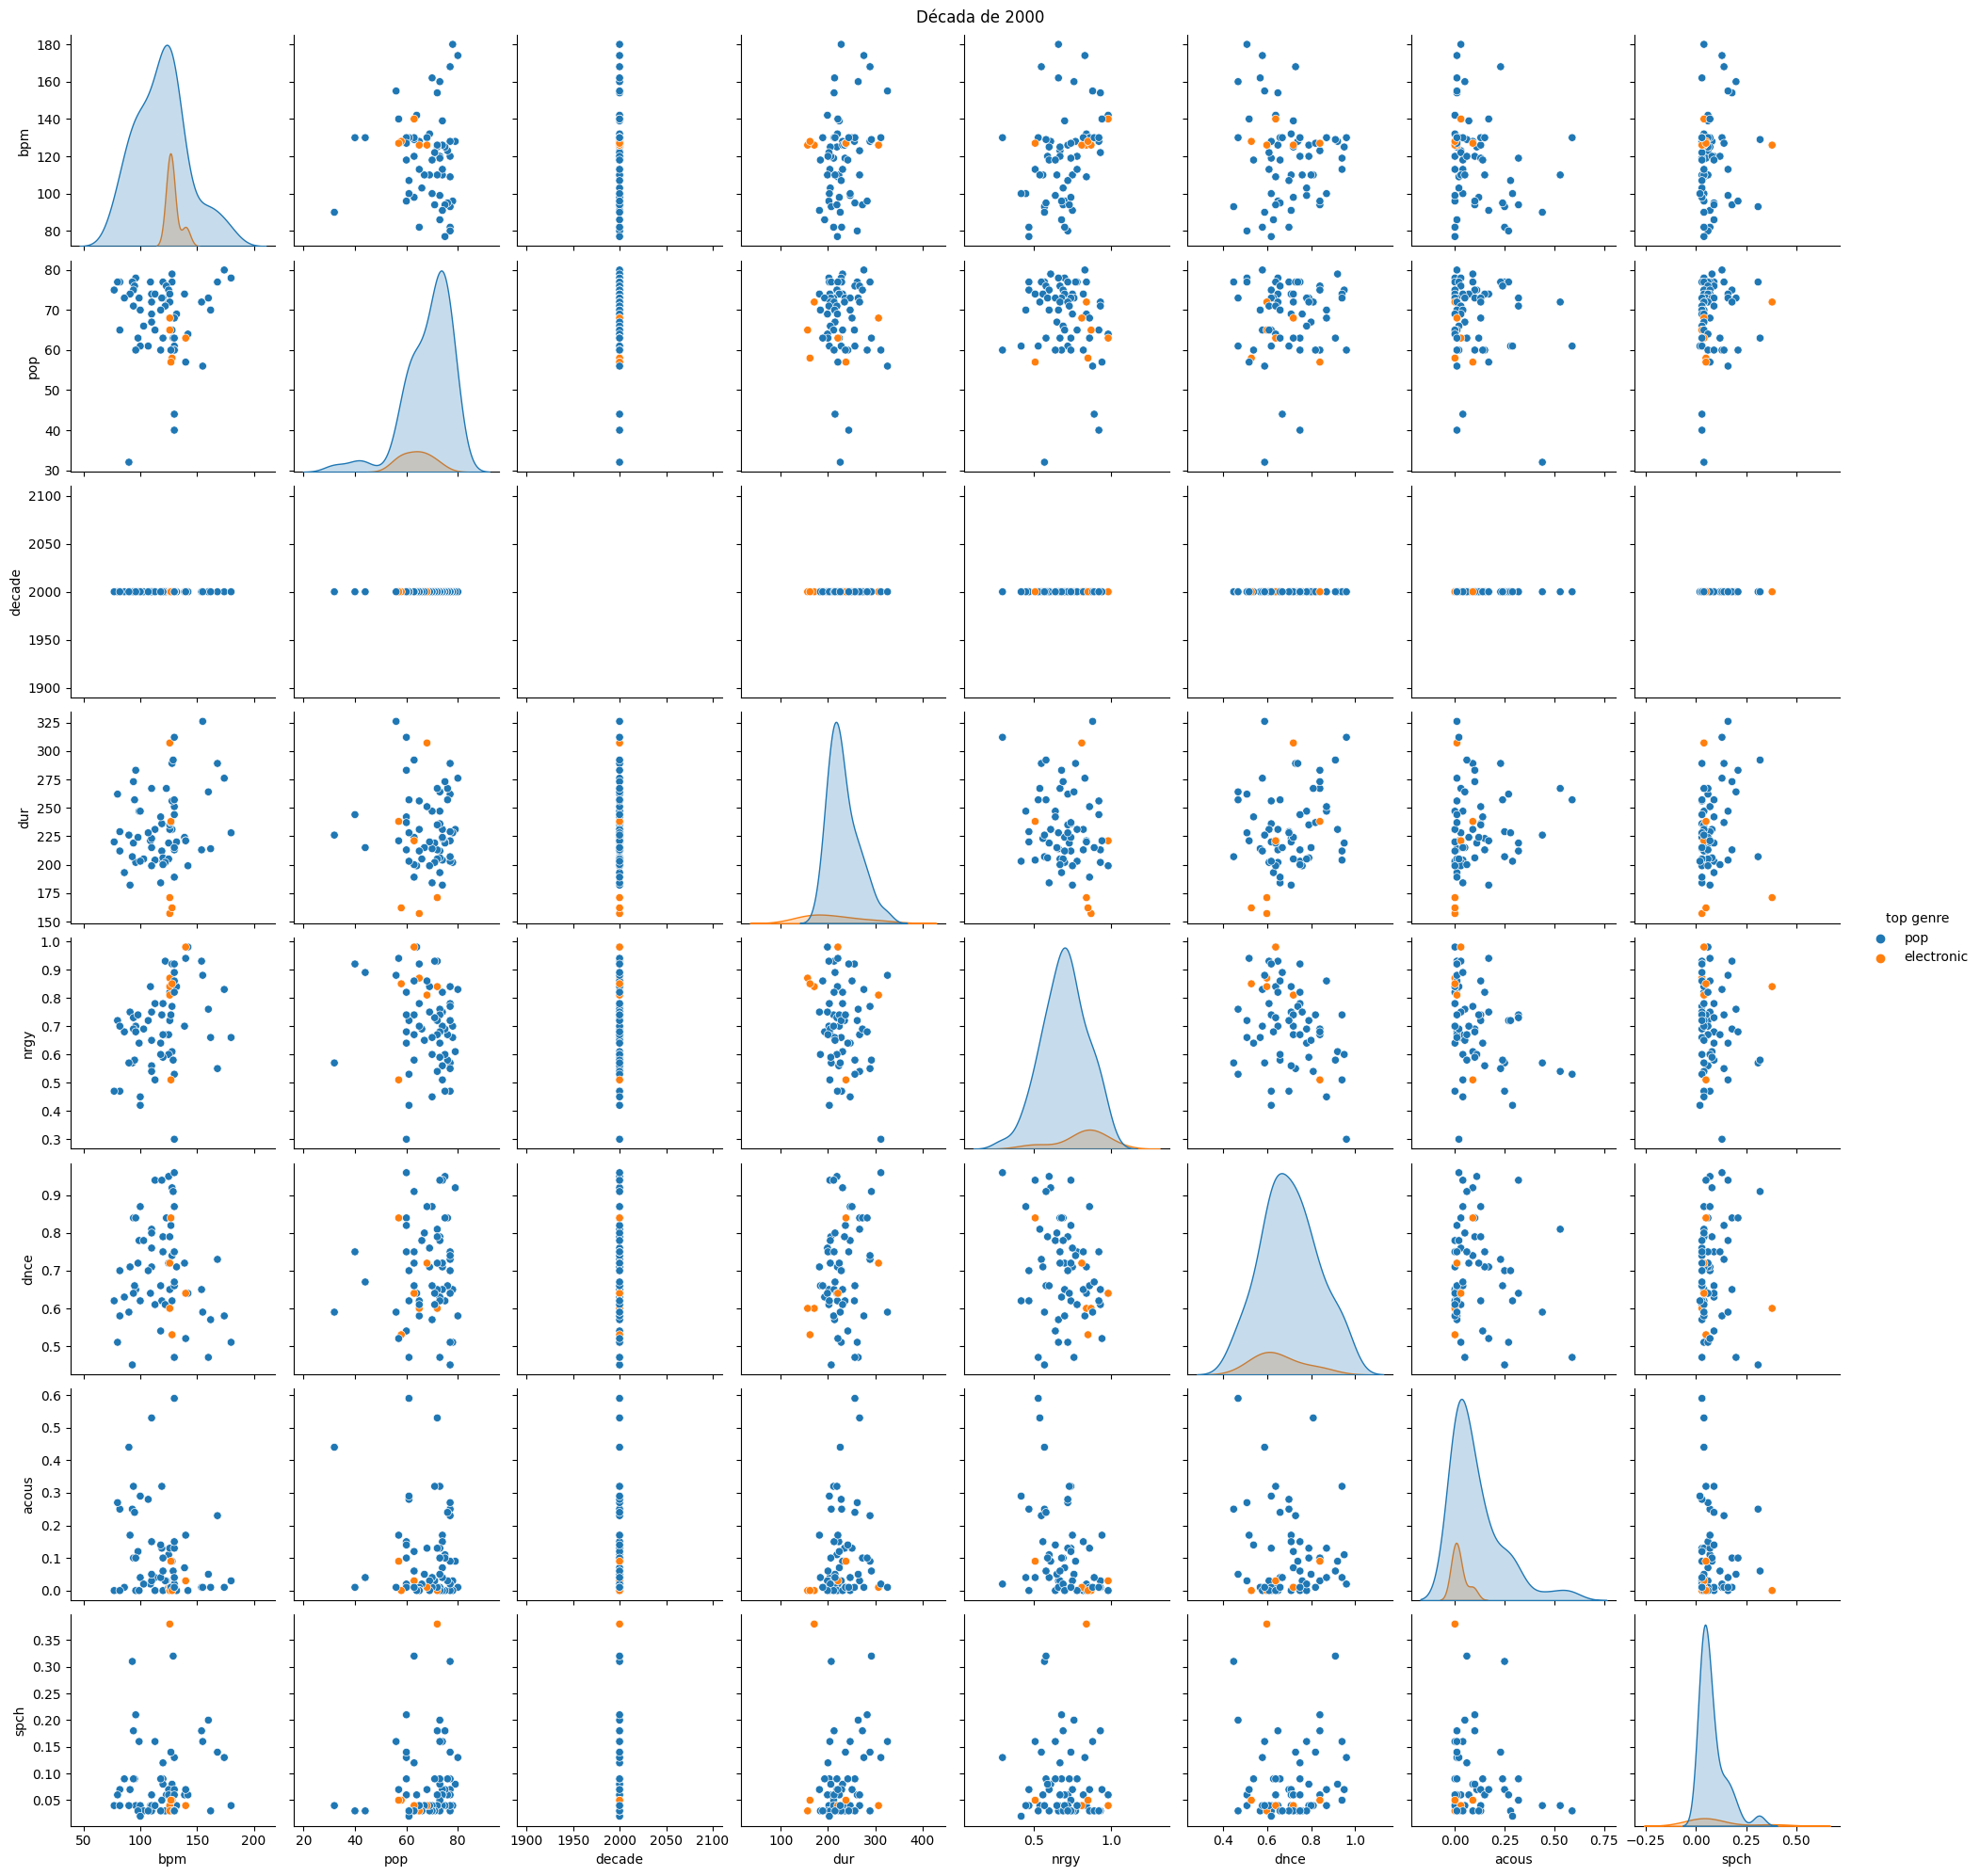

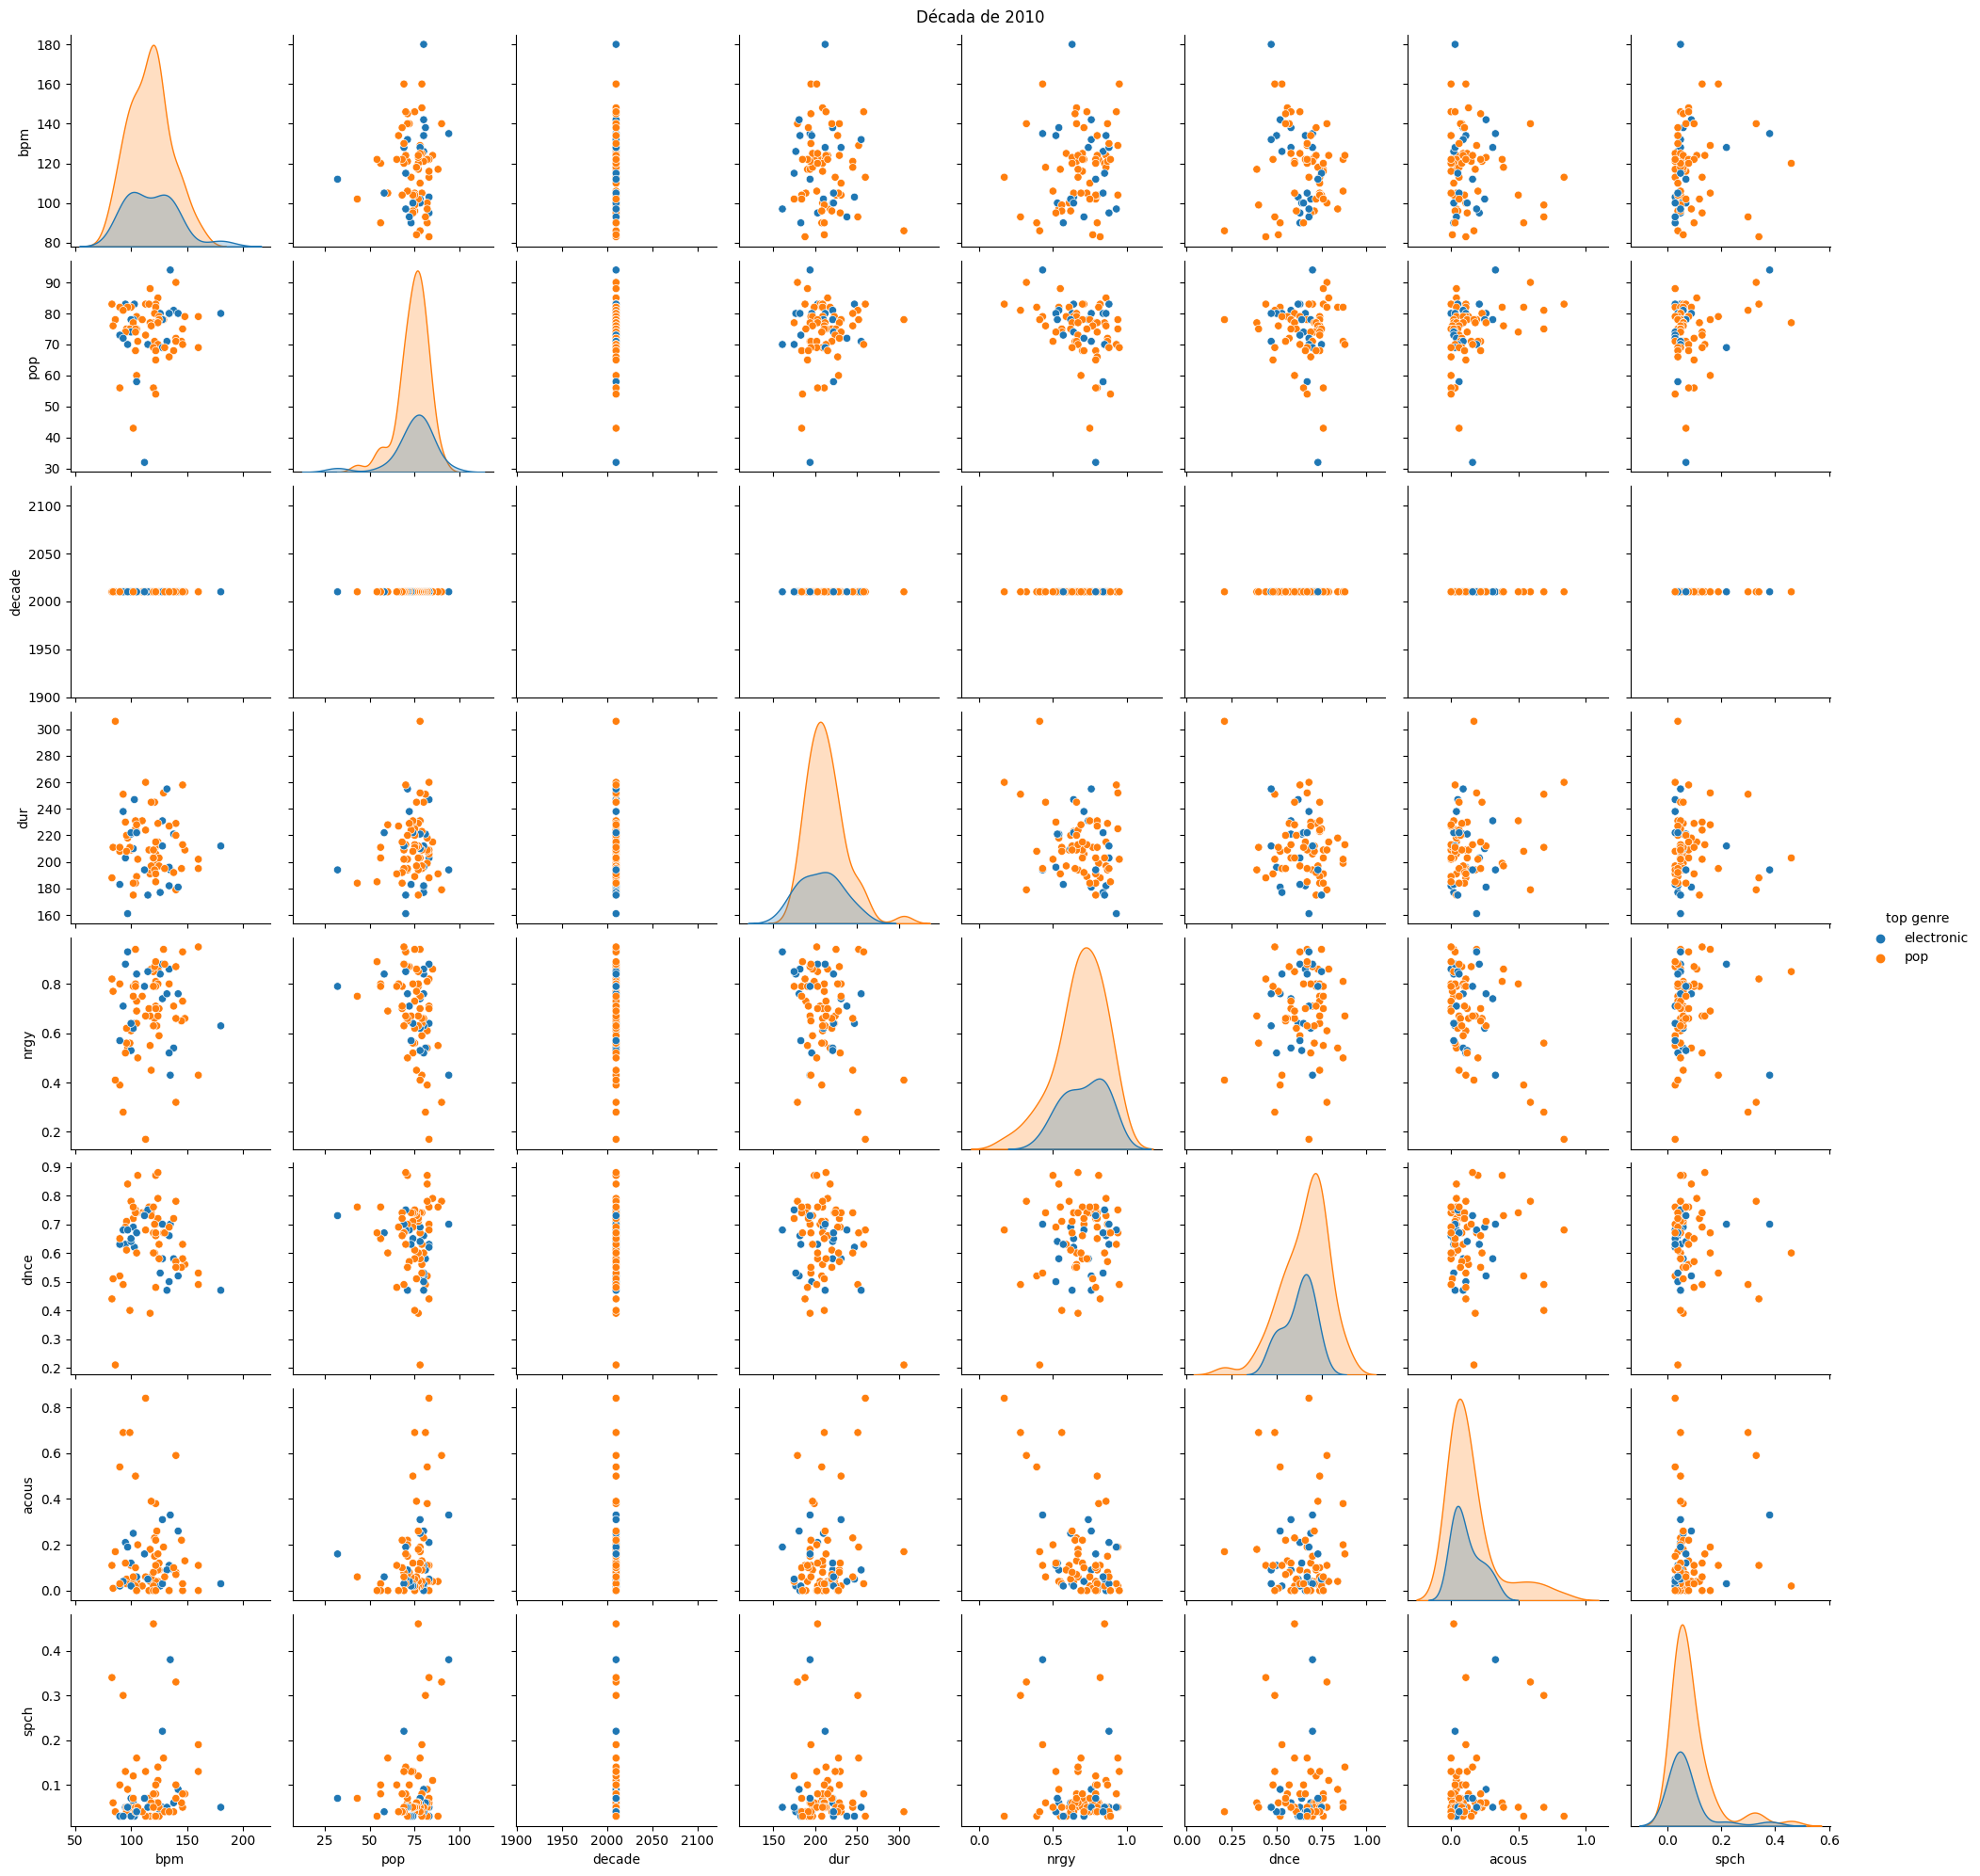

In [ ]:
some_decades = [1980, 1990, 2000, 2010]
for decade in some_decades:
  dataframe = all_decades_modified[all_decades_modified['decade'] == decade]
  graph = sns.pairplot(data = dataframe, hue = 'top genre')
  graph.fig.suptitle(f'Década de {decade}', y=1)
  #plt.savefig('/content/gdrive/My Drive/paiplot'+str(decade)+'.png', bbox_inches = 'tight')
  #files.download('/content/gdrive/My Drive/paiplot'+str(decade)+'.png')
  #plt.show()

Probando con los pares pop-rock, pop-electronica, pop-hip hop y rock-blues no notamos ninguna diferencia marcada en ninguno de los gráficos

# 1921-2020 dataset

In [3]:
df1921_2020.tail()

acousticness                             artists  ...  valence  year
169904        0.1730              ['DripReport', 'Tyga']  ...    0.306  2020
169905        0.0167  ['Leon Bridges', 'Terrace Martin']  ...    0.270  2020
169906        0.5380               ['Kygo', 'Oh Wonder']  ...    0.153  2020
169907        0.0714       ['Cash Cash', 'Andy Grammer']  ...    0.472  2020
169908        0.1090                  ['Ingrid Andress']  ...    0.366  2020

[5 rows x 19 columns]

In [4]:
df1921_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

## Artistas más escuchados por año
Veamos los artistas que tienen más canciones en el top 100 en cada año:

In [5]:
anios = []
artist_mode = []
for year in range(1921,2020):
    anios.append(year)
    artist_mode.append(df1921_2020[df1921_2020['year'] == year]['artists'].mode()[0])
    #df1921_2020[df1921_2020['year'] == 2019]['artists'].value_counts()

In [7]:
df_popular_artist = pd.concat([pd.DataFrame(anios), pd.DataFrame(artist_mode)], axis=1)
df_popular_artist.set_axis(['Year', 'Artist'], axis=1, inplace=True)

In [9]:
df_popular_artist[0:25]
#df_popular_artist[25:50]
#df_popular_artist[50:75]

Year                           Artist
75  1996                      ['Sublime']
76  1997                  ['Erykah Badu']
77  1998                          ['DMX']
78  1999        ['Red Hot Chili Peppers']
79  2000                  ['Linkin Park']
80  2001                 ['Howard Shore']
81  2002        ['Red Hot Chili Peppers']
82  2003                      ['50 Cent']
83  2004                ['George Strait']
84  2005                       ['Eminem']
85  2006        ['Red Hot Chili Peppers']
86  2007      ['Five Finger Death Punch']
87  2008                 ['Taylor Swift']
88  2009                       ['Eminem']
89  2010                 ['Taylor Swift']
90  2011                         ['C418']
91  2012                 ['Lana Del Rey']
92  2013                        ['Lorde']
93  2014                 ['Taylor Swift']
94  2015                  ['$uicideBoy$']
95  2016  ['Deep Sleep Music Collective']
96  2017                 ['Lil Uzi Vert']
97  2018                          ['BTS']
98  2019                           ['NF']

In [10]:
df_popular_artist[75:100]

Year                           Artist
75  1996                      ['Sublime']
76  1997                  ['Erykah Badu']
77  1998                          ['DMX']
78  1999        ['Red Hot Chili Peppers']
79  2000                  ['Linkin Park']
80  2001                 ['Howard Shore']
81  2002        ['Red Hot Chili Peppers']
82  2003                      ['50 Cent']
83  2004                ['George Strait']
84  2005                       ['Eminem']
85  2006        ['Red Hot Chili Peppers']
86  2007      ['Five Finger Death Punch']
87  2008                 ['Taylor Swift']
88  2009                       ['Eminem']
89  2010                 ['Taylor Swift']
90  2011                         ['C418']
91  2012                 ['Lana Del Rey']
92  2013                        ['Lorde']
93  2014                 ['Taylor Swift']
94  2015                  ['$uicideBoy$']
95  2016  ['Deep Sleep Music Collective']
96  2017                 ['Lil Uzi Vert']
97  2018                          ['BTS']
98  2019                           ['NF']

## Matriz de correlación

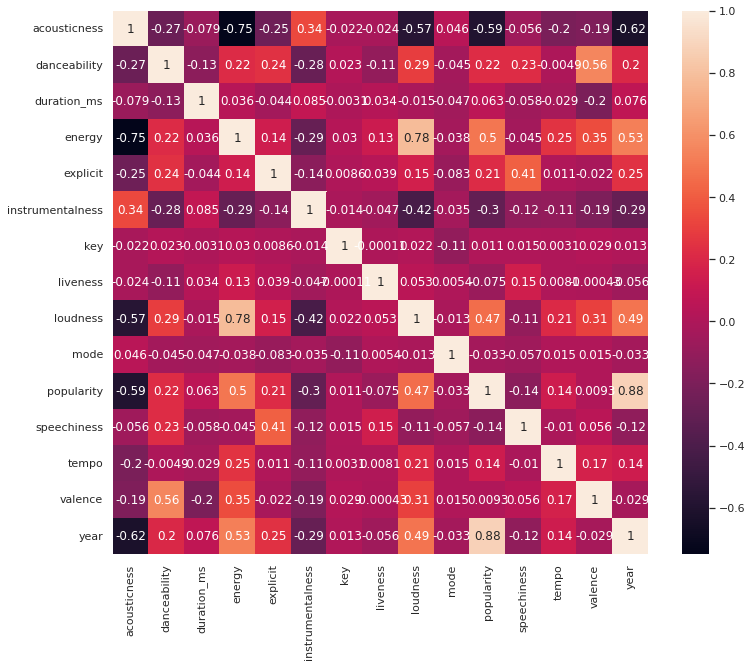

In [ ]:
corr_matrix_1921_2020 = df1921_2020.corr()
sns.heatmap(corr_matrix_1921_2020, annot=True)

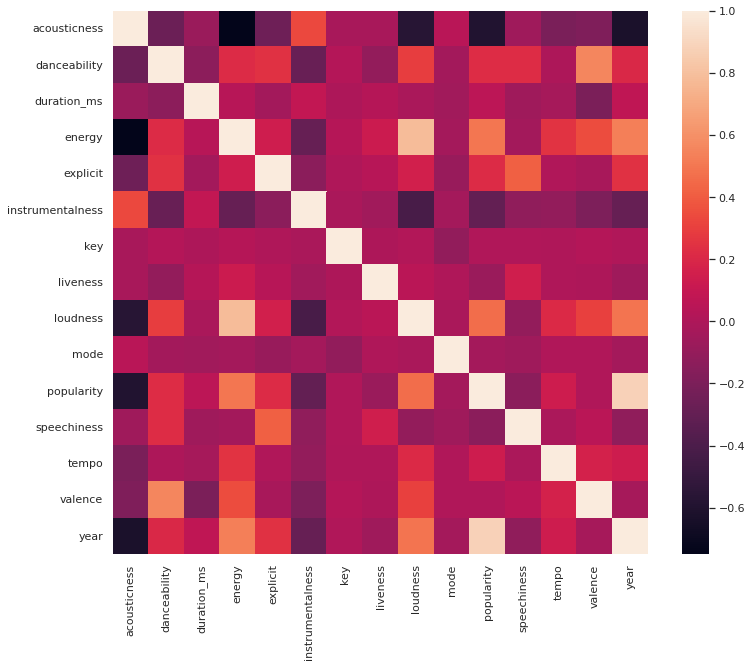

In [ ]:
sns.heatmap(corr_matrix_1921_2020)

# Genre dataset

Fue usado para clasificar algunas canciones que no tenían el género clasificado según nuestros intereses.

In [ ]:
set(df_genre['genre'])

{'blues', 'country', 'hip hop', 'jazz', 'pop', 'reggae', 'rock'}

# To-do's
* Limpiar los datos (OK)
* frecuencia vs. tiempo por género (OK)
* tempo y variabilidad tempo (OK)

* Clasificar mejor los viejos (OK)
* Clasificador géneros
* Top artistas
* Correlaciones (OK)